In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv('kidney_disease.csv')
df.sample()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
261,261,49.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,41,5600,4.9,no,no,no,good,no,no,notckd


In [56]:
df = df.drop(['id', 'age',], axis=1)

In [57]:
df.sample()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
252,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,82.0,49.0,...,46,9100,4.7,no,no,no,good,no,no,notckd


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  rc              270 non-null    object 
 17  htn             398 non-null    obj

In [59]:
numerical = []
catgoals = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgoals.append(col)
        
for col in df.columns:
    if col in numerical:
        # df[col].fillna(df[col].median(), inplace=True)
        df.fillna({col: df[col].median()}, inplace=True)
    else:
        df.fillna({col: df[col].mode()[0]}, inplace=True)
        # df[col].fillna(df[col].mode()[0], inplace=True)

In [60]:
numerical

['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [61]:
catgoals

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [62]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [63]:
df['classification'] = df['classification'].replace(['ckd\t'], 'ckd')

In [64]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [65]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgoals:
    df[col] = le.fit_transform(df[col])
    

In [67]:
df['classification'] = le.fit_transform(df['classification'])

In [68]:
x = df[ind_col]
y = df[dep_col]

In [69]:
df.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,27,0,3,1,0,0,0,0


In [70]:
df.to_csv('kidney-disease.csv', index=False)

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best')

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"report : \n{classification_report(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test,dtc.predict(x_test))
print(f"classification report : \n{classification_report(y_test, dtc.predict(x_test))}\n")

akurasi data training = 0.99375
akurasi data testing = 1.0 

confusion matrix : 
[[52  0]
 [ 0 28]]

report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80




In [73]:
input_data = (80.0,1.02,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,32,72,34,1,4,1,0,0,0,)

input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have a CKD')
else:
  print('The person has CKD')


[0]
The person does not have a CKD


C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


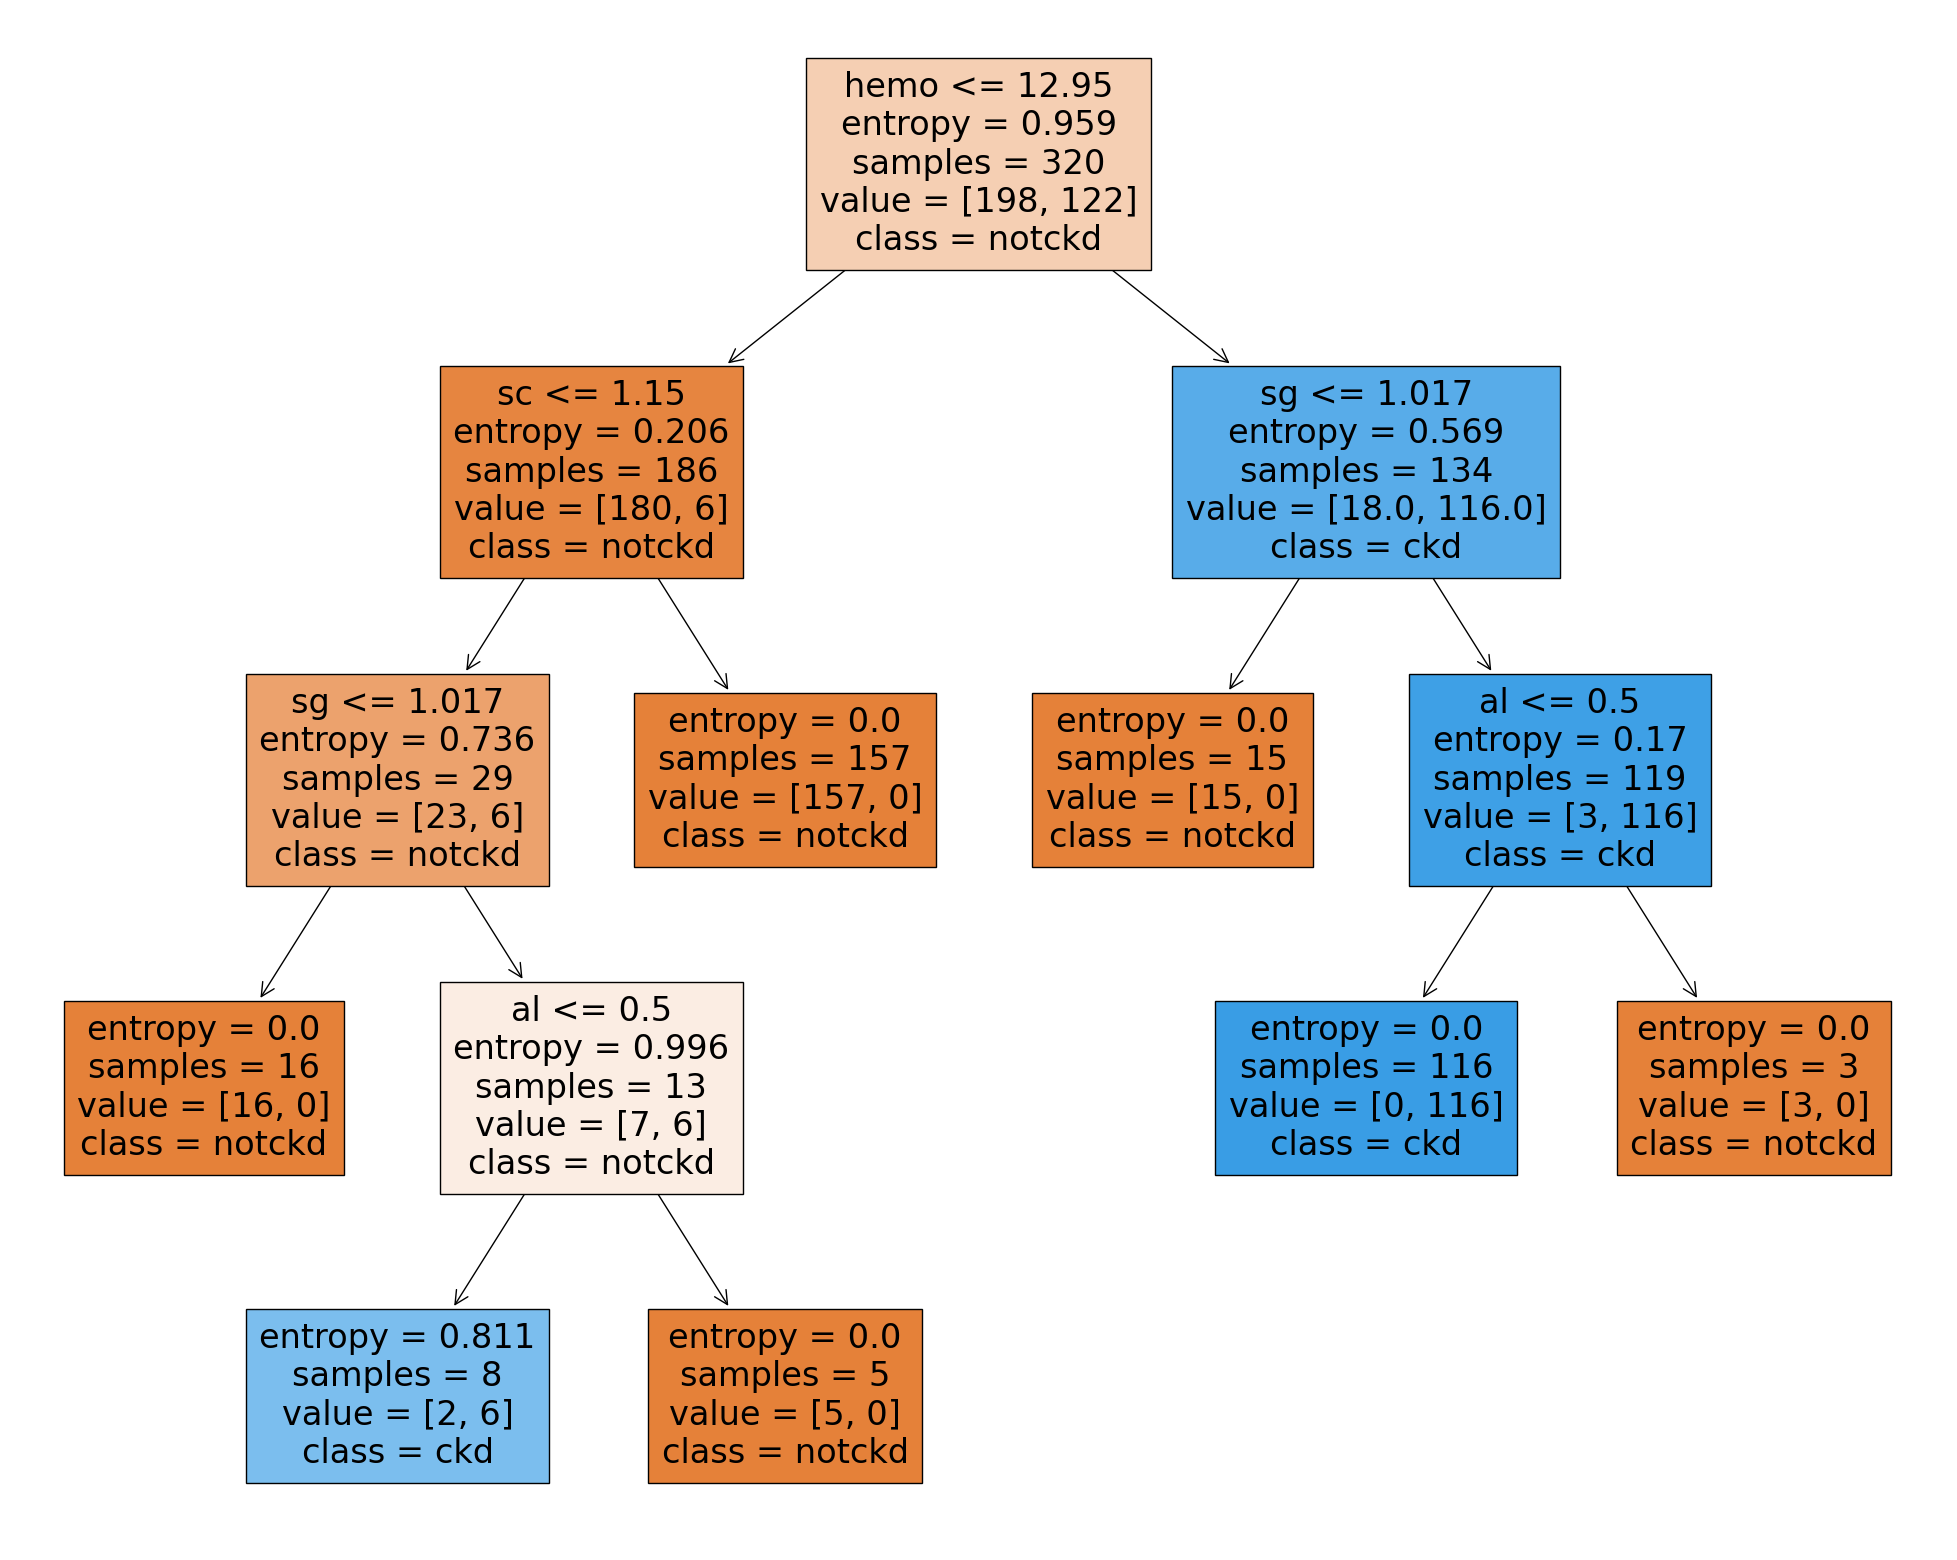

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=ind_col,  
                   class_names=['notckd', 'ckd'],
                   filled=True)